# Hard coded

In [1]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
print(f"X_train shape: {X_train.shape} \ny_train type: {type(y_train)} ")

X_train shape: (6, 2) 
y_train type: <class 'numpy.ndarray'> 


In [3]:
def zscore_normlize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    
    return X_norm, mu, sigma

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        f_wb_i = np.clip(f_wb_i, 1e-10, 1-1e-10)  # Prevents log(0)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    return cost / m

In [6]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i 
    dj_dw/=m
    dj_db/=m
    
    return dj_db, dj_dw

In [7]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        
        if i<100000:
            J_history.append( compute_cost(X, y, w, b) )
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

In [8]:
X_norm, _, _ = zscore_normlize_features(X_train)
w_tmp = np.zeros_like(X_norm[0])
b_tmp = 0.
alpha = 0.1
iters = 10000

w_final, b_final, J_hist = gradient_descent(X_norm, y_train, w_tmp, b_tmp, alpha, iters)
print(f"Final parameters: w: {w_final}, b: {b_final} ")

Iteration    0: Cost 0.6788815508141411   
Iteration 1000: Cost 0.021604284454311826   
Iteration 2000: Cost 0.010830181179059517   
Iteration 3000: Cost 0.007225866225043509   
Iteration 4000: Cost 0.005422067860071106   
Iteration 5000: Cost 0.004339286938387656   
Iteration 6000: Cost 0.003617197710240309   
Iteration 7000: Cost 0.0031012830350538086   
Iteration 8000: Cost 0.0027142579935863277   
Iteration 9000: Cost 0.0024131763872544585   
Final parameters: w: [6.50976053 5.82722579], b: 0.40848262451151074 


In [9]:
def plot_logistic_regression(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label="Training Data", marker='o', edgecolors='k')

    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, label="Decision Boundary", color='blue')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

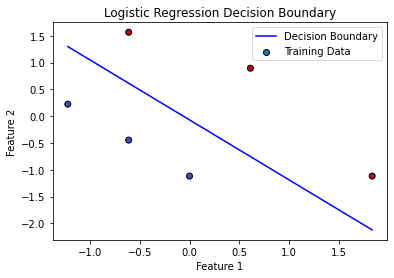

In [10]:
plot_logistic_regression(X_norm, y_train, w_final, b_final)

# Scikit-learn

In [26]:
!pip install --upgrade scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
X, y = make_classification(n_samples=10000,  # Number of samples
                           n_features=10,    # Number of features
                           n_classes=2,      # Binary classification (0 or 1)
                           n_informative=5,  # Number of informative features
                           n_redundant=2,    # Number of redundant features
                           random_state=42)
X.shape

(10000, 10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [15]:
accuracy = lr_model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")

Model accuracy on test set: 76.85%


In [16]:
print(lr_model.score(X, y))

0.7793


# PCA Approach

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

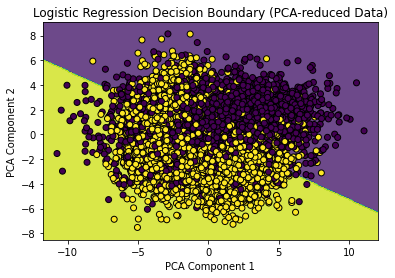

In [18]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the grid
Z = lr_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Create plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Logistic Regression Decision Boundary (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# LDA Approach

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_lda, y_train)

LogisticRegression()

In [21]:
X_test_lda = lda.transform(X_test)

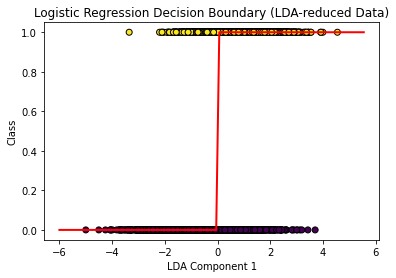

In [22]:
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)

# Predict class labels for each point in the grid
yy = lr_model.predict(xx.reshape(-1, 1))

# Create the plot
plt.scatter(X_lda, y_train, c=y_train, edgecolors='k', marker='o')
plt.plot(xx, yy, color='red', linewidth=2)  # Decision boundary
plt.title('Logistic Regression Decision Boundary (LDA-reduced Data)')
plt.xlabel('LDA Component 1')
plt.ylabel('Class')
plt.show()

In [23]:
accuracy = lr_model.score(X_test_lda, y_test)
print(f"Model accuracy on LDA-transformed test set: {accuracy * 100:.2f}%")

Model accuracy on LDA-transformed test set: 76.70%


In [24]:
import numpy as np

# Assuming the LDA model is already fitted and lr_model is trained
input_value = np.array([[145]])  # Reshaped to 2D array (1 sample, 1 feature after LDA)

# Make prediction using the logistic regression model trained on LDA-reduced data
prediction = lr_model.predict(input_value)
print(f"Predicted class for input {input_value[0][0]}: {prediction[0]}")


Predicted class for input 145: 1
